In [9]:
#load tripadvisor_hotel_reviews.csv
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../tripadvisor_hotel_reviews.csv')
df = df.sample(frac=1).reset_index(drop=True) #shuffle the dataset
df.head()

,Review,Rating
0,super hotel really helpful staff just returned...,4
1,just ok honeymoon stayed honeymoon booking sta...,3
2,amazing stay casablanca add glowing reviews fa...,5
3,414 hotel exceeded expecations stayed 414 hote...,5
4,nice evening preparation dinner concert night ...,5


,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


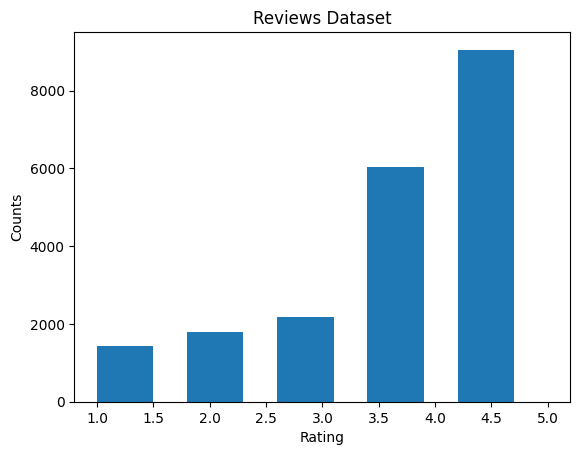

In [10]:
#plot a histogram of the rating column
plt.title("Reviews Dataset")
plt.hist(df['Rating'], bins=5,width=0.5) #bins of [1-1.8, 1.8-2.6, 2.6-3.4, 3.4-4.2, 4.2-5]
plt.xlabel("Rating")
plt.ylabel("Counts")
df.describe()

[1421, 1421, 1421, 1421, 1421]


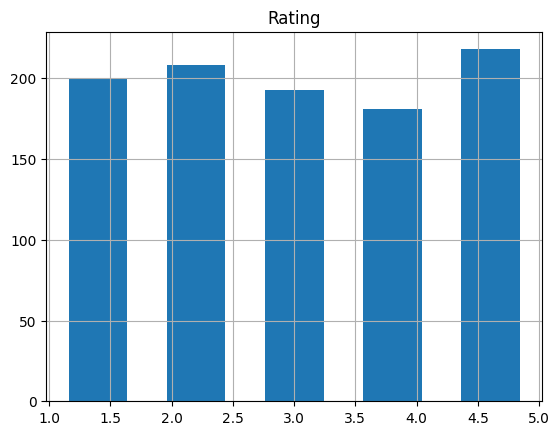

In [11]:

#split data into [1-2,2-3,3-4,4-5] rating groups
ranges=[]
for i in range(1,6):
    ranges.append(df[df['Rating'].between(i,i+1,inclusive="left")]) #e.g. 1's, but not 2's

minSize=min([len(bin) for bin in ranges]) #minimum bin size

#sample each bin to the minimum bin size – eventually will want to choose this based on a skewed gaussian.
for i in range(0,5):
    ranges[i]=ranges[i].sample(minSize) 

print([len(bin) for bin in ranges]) #check that all bins are the same size

#concatenate the bins back together
df=pd.concat(ranges)

df=df.sample(n=1000)

#hist of df
df.hist(column='Rating',bins=5, rwidth=0.6)
#save as csv in "../datasets/ratings/sampled_reviews_no_skew.csv"
df.to_csv('../datasets/ratings/sampled_reviews_no_skew.csv', index=False)


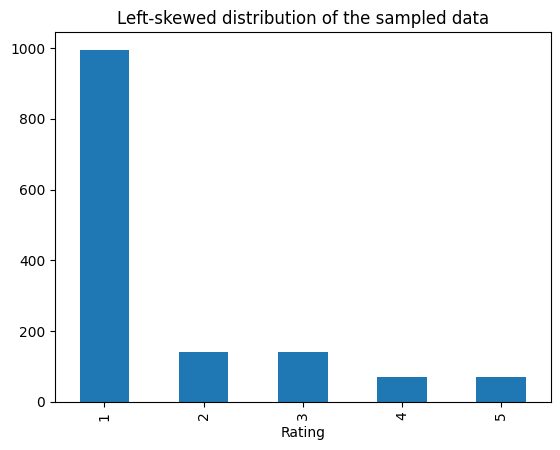

In [33]:
# Probabilities for each class
probabilities = {1: 0.7, 2: 0.1, 3: 0.1, 4: 0.05, 5: 0.05}

# Sample from each class based on the probabilities
samples = []
for rating, prob in probabilities.items():
    sample = df[df['Rating'] == rating].sample(frac=prob, random_state=42)
    samples.append(sample)

# Concatenate all samples
sampled_df = pd.concat(samples)
# plot the distribution of the sampled data
plt.title("Left-skewed distribution of the sampled data")
sampled_df['Rating'].value_counts().plot(kind='bar')
sampled_df.to_csv('./datasets/ratings/sampled_reviews_left_skew.csv', index=False)

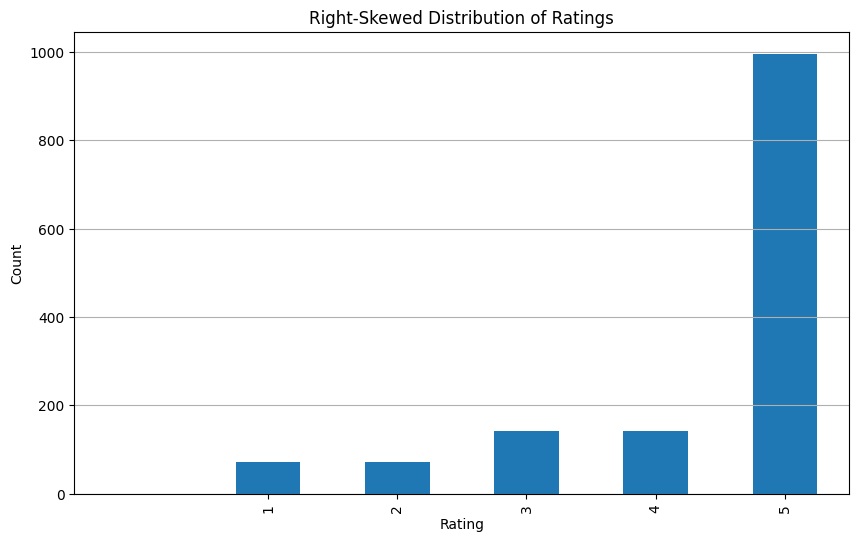

In [32]:
# Probabilities for each class
probabilities = {1: 0.05, 2: 0.05, 3: 0.1, 4: 0.1, 5: 0.7}

# Sample from each class based on the probabilities
samples = []
for rating, prob in probabilities.items():
    sample = df[df['Rating'] == rating].sample(frac=prob, random_state=42)
    samples.append(sample)

# Concatenate all samples
sampled_df = pd.concat(samples)
# plot the distribution of the sampled data from 0 to 5 using this but make sure the x axis is 0 to 5 sampled_df['Rating'].value_counts().plot(kind='bar')
# sampled_df['Rating'].value_counts().plot(kind='bar')
import matplotlib.pyplot as plt

# Get the count of each rating in the sampled data
rating_counts = sampled_df['Rating'].value_counts()

# Reindex the Series to ensure it has values from 0 to 5
rating_counts = rating_counts.reindex(range(6), fill_value=0)

# Plot the Series
rating_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Right-Skewed Distribution of Ratings")
plt.xticks(range(1,6))
plt.grid(axis='y')
plt.show()

# Save the sampled data to a CSV file
sampled_df.to_csv('./datasets/ratings/sampled_reviews_right_skew.csv', index=False)



